## OUMAKHLOUF Selym

# TP 3 : Modèles de Régression

**Avant de commencer :** Merci de bien lire le préambule et l'énoncé de ce TP. Ça vous évitera de perdre beaucoup de temps ensuite. 

**Rendu :** Le rendu doit contenir uniquement le fichier `.ipynb`. Le notebook doit être propre, le plus illustré et le plus commenté possible. 

**Librairies :** Ce TP repose sur les librairies standard suivantes : 
- Numpy version : 1.23.1
- Pandas version : 1.4.3
- Matplotlib version : 3.5.2
- Scikit learn version : 1.1.1

<!-- En plus, on dispose d'un fichier `utils_tp3.py` qui contient des fonctions supplémentaires pour vous faciliter la vie. Vous devez mettre ce fichier **dans le même répertoire** que le fichier `.ipynb`. Vous ne devez pas modifier son contenu. Les fonctions présentes dans ce fichier sont directement disponibles grâce à l'appel `from utils import *`. -->

Pour vérifier qu'elles sont bien installées dans votre environnement de travail, lancez la cellule suivante. Elle ne doit pas renvoyer d'erreur (un `Warning` n'est en général pas trop embêtant). 

Pour les numéros _exacts_ de version, ce n'est pas très grave s'il y a une petite différence (par exemple `numpy 1.22` au lieu de `1.23`), mais si vous avez une trop grosse différence (par exemple `sklearn 0.23` au lieu de `sklearn 1.1`), mettez à jour votre librairie. 

S'il vous manque une librairie (`No module named ...`), vous pouvez l'installer 
- Soit en utilisant votre gestionnaire d'environnement (p.ex. `conda`). 
- Soit directement depuis le notebook, en faisant
```
!pip install nom_de_la_librairie==numero_de_la_version
```

In [8]:
%matplotlib inline

import numpy as np
print("- Numpy version :", np.__version__)
import pandas as pd
print("- Pandas version :", pd.__version__)
import matplotlib.pyplot as plt
import matplotlib
print("- Matplotlib version :", matplotlib.__version__)

import sklearn
print("- Scikit learn version :", sklearn.__version__)
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import utils_tp3 as utils

- Numpy version : 1.24.2
- Pandas version : 1.5.3
- Matplotlib version : 3.6.3
- Scikit learn version : 1.2.1


# Partie 1 : Regression sur un "vrai" dataset

On va s'intéresser dans cette partie à un jeu de données fourni par `scikit-learn`: le `diabeŧ` dataset, dont la documentation est disponible [ici](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). Il est constitué de 442 observations en dimension 10 : âge, sexe, indice de masse corporel (lié au ratio taille vs poids), et quelques éléments médicaux comme le taux de cholestérol, etc.). 

**Attention :** les données ont été **normalisées**, une opération que nous verrons à l'occasion et qui permet d'éviter que des ordres de grandeurs trop différents affecte trop le modèle (par exemple l'âge vaut 50 et le taux de glicémine vaut 0.001, ce n'est pas comparable a priori. Là on a tout mis "à la même échelle"). 

L'objectif est de prédire une variable numérique qui décrit l'évolution de la maladie sur un an (si j'ai bien compris, plus c'est élevé moins c'est bon signe). 

On commence par charger le jeu de données avec `load_diabetes` (fourni par `sklearn`, importé en début de TP). On propose deux formats : un simple tableau `numpy` (pratique pour utiliser `sklearn` ensuite) et un `dataframe` (pratique pour l'exploration etc.). 

In [9]:
# Version numpy
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Version pandas
df_diabetes_X, df_diabetes_y = load_diabetes(return_X_y=True, as_frame=True)

In [10]:
df_diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

**Question 1:** Avant d'attaquer la vraie phase d'apprentissage, commencez par faire un peu d'exploratoire avec pandas (donc la variable `df_diabetes_X`).

### Informations dans le User-Guide
Attribute Information:
- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

In [11]:
print("Shape:", df_diabetes_X.shape)
print()
for feature in df_diabetes_X.columns:
    print(f"Valeurs null dans {feature}: {df_diabetes_X[feature].isnull().sum()}")
    
print()    
print(f"Première ligne:\n {df_diabetes_X.head(1)}")
print()
print(f"Dernière ligne:\n {df_diabetes_X.tail(1)}")

print()
for feature in df_diabetes_X.columns:
    print(f"Nombres de valeurs dans {feature}: {len(df_diabetes_X[feature])}")
    print(f"Nombres de valeurs uniques dans {feature}: {len(df_diabetes_X[feature].unique())}")
    print()
    
print(f"Sex: {df_diabetes_X['sex'].unique()}")

print()
print(f"Corr:\n {df_diabetes_X.corr()}")

Shape: (442, 10)

Valeurs null dans age: 0
Valeurs null dans sex: 0
Valeurs null dans bmi: 0
Valeurs null dans bp: 0
Valeurs null dans s1: 0
Valeurs null dans s2: 0
Valeurs null dans s3: 0
Valeurs null dans s4: 0
Valeurs null dans s5: 0
Valeurs null dans s6: 0

Première ligne:
         age      sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.05068  0.061696  0.021872 -0.044223 -0.034821 -0.043401   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  

Dernière ligne:
           age       sex      bmi        bp       s1        s2        s3  \
441 -0.045472 -0.044642 -0.07303 -0.081413  0.08374  0.027809  0.173816   

           s4        s5        s6  
441 -0.039493 -0.004222  0.003064  

Nombres de valeurs dans age: 442
Nombres de valeurs uniques dans age: 58

Nombres de valeurs dans sex: 442
Nombres de valeurs uniques dans sex: 2

Nombres de valeurs dans bmi: 442
Nombres de valeurs uniques dans bmi: 163

Nombres de valeurs dans bp: 442
Nombres 

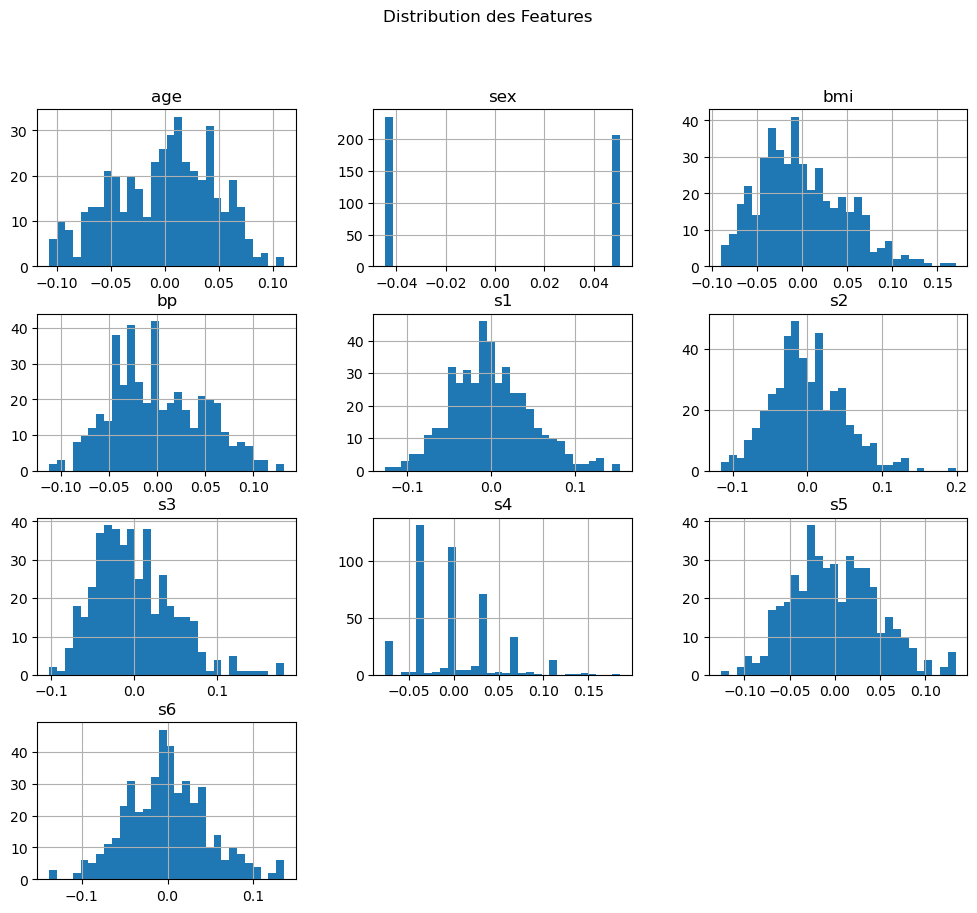

In [12]:
df_diabetes_X.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribution des Features")
plt.show()

- Taille : 442 x 10
- Aucune colonne possède de valeur nulle
- 58 ages répartient de manière non homogène
- 2 sexes différents
- Fortes corrélation entre certaines variables :
    * s1 (tc) et s2 (ldl) -> 0.90
    * s1 (tc) et s4 (hdl) -> 0.54
    * s2 (ldl) et s4 (hdl) -> 0.66
    * s4 (hdl) et s5 (ltg) -> 0.62
    * s5 (ltg) et s6 (glu) -> 0.46

---

On va maintenant faire une tâche d'apprentissage (de régression) avec ce dataset. On va rappeler la procédure à suivre.

**Question 2:** Séparer votre jeu de données en jeu d'entraînement / validation en utilisant la méthode `train_test_split` de `sklearn` (chargée en début de TP). Pour la doc, c'est [ici](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

Répondez également aux questions suivantes : avec les paramètres par défaut de `train_test_split`, 
- La séparation est-elle bien aléatoire ? 
- Quelle est la proportion train/test ? Est-ce réglable ?

In [13]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

- La séparation est aléatoire
- La proportion par défaut est 75% train, 25% test
- Les proportions sont réglables

---

On propose de commencer, pour faire simple, par une régression linéaire, en utilisant la classe `LinearRegression` de `sklearn` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). 

**Question 3:** Instanciez un modèle de régression linéaire et entrainez-le sur le jeu d'entraînement construit à la question précédente. Vous pouvez regarder les slides du cours ou la documentation de `sklearn` pour avoir la démarche à suivre. 

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
predictions = model.predict(x_test)

print("Train: ", train_score)
print("Test: ", test_score)

print()
for i in range(10):
    print(f"Prédiction[{i}] -> {predictions[i]}")
    print(f"y_test[{i}] -> {y_test[i]}")
    print()

Train:  0.5206046229253556
Test:  0.48380683116855994

Prédiction[0] -> 230.9707666709651
y_test[0] -> 261.0

Prédiction[1] -> 223.22851806810343
y_test[1] -> 232.0

Prédiction[2] -> 117.29294132235682
y_test[2] -> 59.0

Prédiction[3] -> 146.0098758056813
y_test[3] -> 210.0

Prédiction[4] -> 150.6725115306225
y_test[4] -> 118.0

Prédiction[5] -> 124.82550275487515
y_test[5] -> 162.0

Prédiction[6] -> 76.76665479180647
y_test[6] -> 80.0

Prédiction[7] -> 76.5953835252985
y_test[7] -> 128.0

Prédiction[8] -> 70.43149647490588
y_test[8] -> 39.0

Prédiction[9] -> 99.43039798639735
y_test[9] -> 49.0



---

**Question 4:** Déterminer la mse de votre modèle sur le jeu d'entraînement, puis le jeu de test. Commentez les résultats obtenus. 

In [16]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print(f"MSE entrainement -> {mean_squared_error(y_train, train_predictions)}")
print(f"MSE test -> {mean_squared_error(y_test, test_predictions)}")

MSE entrainement -> 2683.4368995421046
MSE test -> 3459.376296829003


La MSE sur l'entrainement, **2638**, est plus faible que la MSE sur le jeu de test, **3646**

Le modèle fait de l'overfitting

---

Comme vu en cours, pour être vraiment confiant dans la performance de notre modèle, il faut répéter plusieurs fois la méthodologie sus-mentionnée. C'est également utile si on veut pouvoir rapidement évaluer un modèle. Il est donc pratique de regrouper toutes les étapes précédentes en une seule fonction. 

**Question 5:** Écrire une fonction `test_model(model, X, y, n_repet)` qui : 
- prend un modèle `model` de sklearn (remarque : les modèles de scikit-learn ont tous les méthodes `fit`, `fit_transform`, etc.)
- prend un dataset avec des observations `X` et des labels `y`

et qui répète `n_repet` fois les opérations suivantes :

- Sépare `X,y` en jeu de train/test
- Entraîne `model` sur le jeu d'entraînement
- Détermine la _training loss_ et la _test loss_ de `model`. 

pour ensuite renvoyer la _test loss_ moyenne et l'écart-type sur les répétitions. 

_Indication:_ Stocker les _test losses_ dans une liste, puis appeler `np.mean(...)` pour avoir la moyenne, et `np.std(...)` pour avoir l'écart-type (_standard deviation_ en anglais). 

In [17]:
# Écrivez votre code ici. 

def test_model(model, X, y, n_repet):
    
    test_losses = list()
    train_losses = list()
    
    for i in range(n_repet):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        model.fit(X_train, y_train)
        
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        
        train_loss = mean_squared_error(y_train, train_predictions)
        test_loss = mean_squared_error(y_test, test_predictions)
        
        test_losses.append(test_loss)
        train_losses.append(train_loss)
        
        
    mean_loss = np.mean(test_losses)
    mean_train_loss = np.mean(train_losses)
    std_loss = np.std(test_losses)
    print(f"Moyenne Test Loss: {int(mean_loss)}")
    print(f"Moyenne Train Loss: {int(mean_train_loss)}")
    print(f"Equart-Type Test Loss: {int(std_loss)}")
        
    return mean_loss, std_loss, mean_train_loss
        

In [ ]:
model = LinearRegression()
mean_loss, std_loss, mean_train_loss = test_model(model, diabetes_X, diabetes_y, 5)

---

**Question 6:** Tester différents modèles de régression proposés par `sklearn`. La liste de tous les modèles de `sklearn` est disponible [ici](https://scikit-learn.org/stable/supervised_learning.html), et on se concentrera sur les modèles qui ont "Regression" dans leur nom, comme par exemple : 
- [Nearest Neighbors Regression](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression)
- [SVM regression](https://scikit-learn.org/stable/modules/svm.html#regression)
- [Decision tree regression](https://scikit-learn.org/stable/modules/tree.html#regression)
- etc. 

Vous devez tester au moins deux modèles (autres que la régression linéaire). Pour chaque modèle, vous devez rapidement décrire quels sont ses _hyper-paramètres_ (les paramètres qu'on choisit une fois pour toute **avant** d'entraîner le modèle, comme le $k$ de $k$-means, le `degree` d'une régression polynomiale, etc.), et vous devez tester tester plusieurs valeurs pour l'hyper-paramètre et décrire les résultats obtenus (est-ce qu'on _overfit_, etc.). 

**Important:** Ce n'est **pas grave** si les modèles que vous avez choisi ont de mauvaises performances. L'objectif ici est d'appliquer la bonne méthodologie, de comprendre ce qu'on fait, et d'en tirer les bonnes conclusions. 

### Nearest Neighbors Regression ave l'implémentation KNeighborsRegressor

**hyper-paramètres:**
- `n_neighbors` : entier indiquant le nombre de voisins les plus proches pris en compte
- `weights` : poids des voisins -> `uniform` (égaux) ou `distance` (plus proche = plus important)
- `algorithm` : algo de recherche des voisins -> `auto, ball_tree, kd_tree, brute`
- `p` : distance utilisé `2`(Euclidienne), `1`(Manhattant)
- `metric`
- `metric_params`
- `n_jobs`
- `leaf_size`

On va se concentrer sur le paramètre `n_neighbors` en augmentant sa valeur


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
start, end = 2, 15
mean_losses = list()
train_losses = list()
std_losses = list()


for k in range(start, end):
    print(f"####################### Nombre de voisins : {k}")
    model = KNeighborsRegressor(n_neighbors=k)
    mean_loss, std_loss, mean_train_loss = test_model(model, diabetes_X, diabetes_y, 5)
    mean_losses.append(mean_loss)
    std_losses.append(std_loss)
    train_losses.append(mean_train_loss)
    print()

In [ ]:
plt.plot(range(start, end), mean_losses, label="Test Loss", marker='o')
plt.plot(range(start, end), train_losses, label="Train Loss", marker='x')

plt.title('Évolution de la Test Loss et de la Train loss en fonction du nombre de voisins (k)')
plt.grid(True)
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('MSE')
plt.legend()
plt.show()

- À `k` = 2 l'écart entre la `Train Loss` (1574) et la `Test Loss` (4398) est assez important. Cela indique un overfitting, le modèle est adapté aux données d'entrainement mais pas aux données de test
- Lorsque que `k`augmente, l'écart entre `Train Loss` et `Test Loss` se réduit
- Cependant, à `k` = 9 et à `k` = 12, la `Test Loss` recommence à augmenter, ce qui indique qu'un trop grand nombre de voisins n'est pas forcément meilleur pour le modèle
- On en conclut que `k` = 12 semble être le meilleur compris entre la `Train Loss` et la `Test Loss`, car c'est pour ce nombre de voisins que ces valeurs sont les plus proches

### Decision Tree Regressor

**hyper-paramètres:**
- `criterion`: `{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”` -> fonction pour mesurer la qualité des splits
- `splitter`: `{“best”, “random”}, default=”best”` -> stratégie utiliser pour split sur chaque noeud
- `max_depth`: `entier, default=None` -> profondeur maximale de l'arbre
- `min_samples_split`: `entier ou floatant, default=2`, quantité minimale d'échantillons pour split un noeud
- `min_samples_leaf`: `int or float, default=1`, quantité minimale d'echantillons par feuille
- `min_weight_fraction_leaf`: `float, default=0.0`
- `max_features`: `int, float or {“sqrt”, “log2”}, default=None`

Nous allons nous concentrer sur `max_depth`en augmentant sa valeur

In [ ]:
from sklearn.tree import DecisionTreeRegressor

start, end = 1, 25
mean_losses_tree = list()
train_losses_tree = list()
std_losses_tree = list()

for k in range(start, end):
    print(f"####################### Profondeur max : {k}")
    model = DecisionTreeRegressor(max_depth=k)
    mean_loss, std_loss, mean_train_loss = test_model(model, diabetes_X, diabetes_y, 5)
    mean_losses_tree.append(mean_loss)
    std_losses_tree.append(std_loss)
    train_losses_tree.append(mean_train_loss)
    print()

In [ ]:
plt.plot(range(start, end), mean_losses_tree, label="Test Loss", marker='o')
plt.plot(range(start, end), train_losses_tree, label="Train Loss", marker='x')

plt.title('Évolution de la Test Loss et de la Train loss en fonction de la profondeur max (k) de l\'arbre')
plt.grid(True)
plt.xlabel('profondeur max (k)')
plt.ylabel('MSE')
plt.legend()
plt.show()

La profondeur max `k = 1` semble être le meilleur compromis, c'est la profondeur ou l'écart-type et l'écart entre la Test Loss et la Train Loss est raisonnable

# Partie 2 : Régressions linéaire et polynomiale

## 1. Premier exemple : un jeu en 1D

Dans ce premier exemple, nous allons générer un petit jeu de données en 1D, sur lequel nous allons effectuer une régression linéaire. On rappelle qu'en une dimension, si on a des observations $x_i \in \mathbb{R}$ et des labels $y_i \in \mathbb{R}$, et qu'on cherche un paramètre $\theta \in \mathbb{R}$ optimisant la relation 

$$ y \simeq \theta \cdot x,$$

alors le meilleur $\theta$ possible, au sens de la perte MSE, est donné par 

$$\theta^* = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}.$$

Pour ne pas perdre la main, on va manipuler nos données sous la forme de `DataFrame` du module `pandas`. 

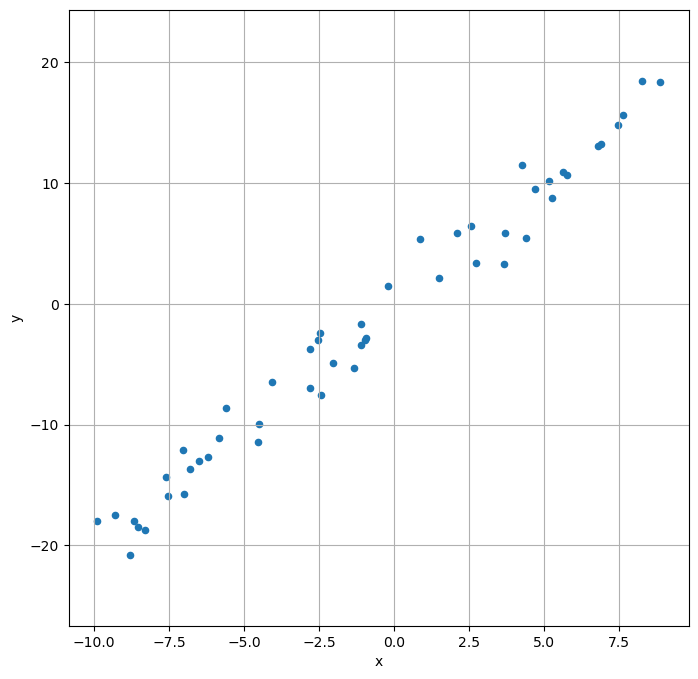

In [18]:
# Génère le dataset sous la forme d'un DataFrame
df = utils.gen_1d_linear_regression_samples(n_samples=50)
# Affiche les points du dataset
utils.plot_1d_regression_samples(df)

----

**Question 1:** Déterminer la valeur du $\theta$ optimal. Afficher la prédiction de votre modèle grâce à l'option `theta=theta_opt` de `plot_1d_regression_samples`.

In [37]:
x = df["x"].values
y = df["y"].values
theta_opt = np.sum(x * y) / np.sum(x ** 2)
print(float(theta_opt))

2.0046699997447215


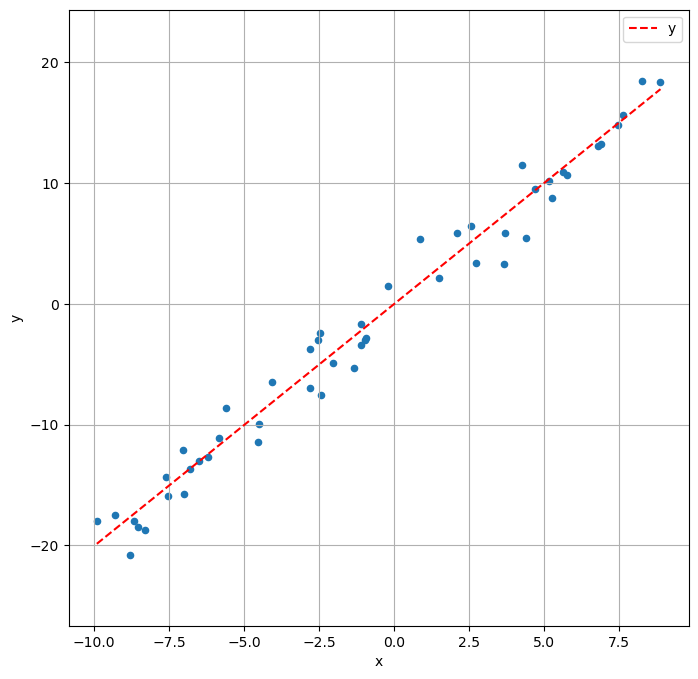

In [38]:
utils.plot_1d_regression_samples(df, theta=float(theta_opt))

---

**Question 2:** Déterminer la MSE réalisée par votre modèle sur ce jeu d'entraînement. 

On rappelle qu'il s'agit de calculer 

$$L(\theta) = \sum_{i=1}^n (\theta x_i - y_i)^2.$$

In [47]:
mse = np.mean(((theta_opt * x) - y) ** 2)
print("MSE:", mse)

MSE: 3.0840405610494734


---

On rappelle que pour vérifier que notre modèle de régression est _vraiment_ pertinent, il faut qu'il réalise une bonne MSE sur le jeu d'entraînement, mais aussi sur un jeu de validation (ou test). Pour ça, on va générer un nouveau `DataFrame` avec des données qui _suivent la même distribution_, et évaluer la performance (mse) de notre modèle avec le `theta_opt` calculé. 

In [48]:
df_test = utils.gen_1d_linear_regression_samples(n_samples=50)

---

**Question 3:** Déterminer la MSE du modèle sur ce jeu de validation. Commenter le résultat obtenu.

In [49]:
x_test = df_test["x"].values
y_test = df_test["y"].values

mse_test = np.mean(((theta_opt * x_test) - y_test) ** 2)
print("MSE:", mse)

MSE: 3.0840405610494734


On retrouve la même MSE, **3,10** ce qui signifie que notre modèle est bien généré, et est bien pertinent

---

On va maintenant considérer un second jeu de données. Ce jeu suit une relation de la forme 

$$y \simeq a x + b,$$

où $\theta = (a,b)$ sont les paramètres à déterminer. 

À proprement parler, il ne s'agit plus d'un problème de régression linéaire, mais de _régression affine_ (même si tout le monde appelle ça une régression linéaire quand même). 

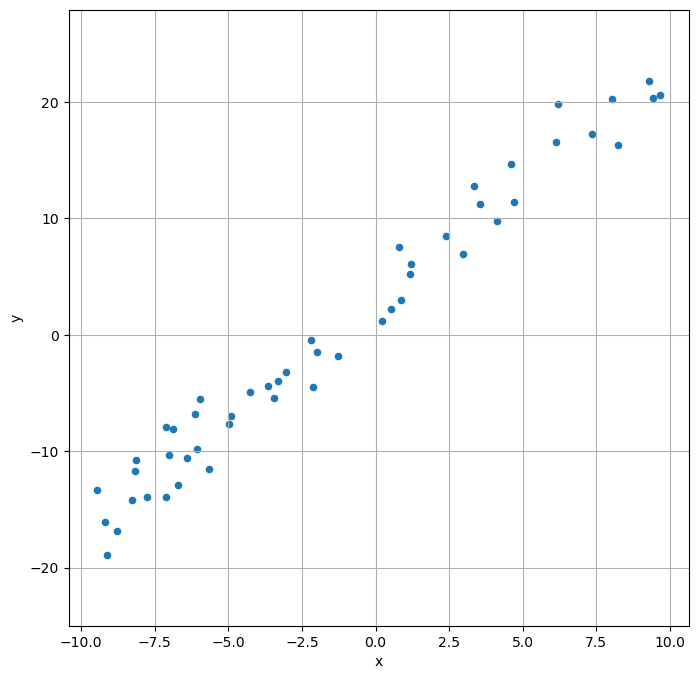

In [42]:
df2 = utils.gen_1d_linear_regression_samples(n_samples=50, b=3)
utils.plot_1d_regression_samples(df2)

---

**Question 4:** La formule $$\theta^* = \frac{\sum x_i y_i}{\sum x_i^2}$$ est-elle toujours d'actualité dans ce modèle ? Pourquoi ?

In [44]:
# Écrivez du code ici pour faire des tests
x2 = df2["x"].values
y2 = df2["y"].values
theta_opt2 = np.sum(x2 * y2) / np.sum(x2 ** 2)
print(float(theta_opt2))

1.8838621321868994


In [46]:
mse2 = np.mean(((theta_opt2 * x2) - y2) ** 2)
print("MSE2:", mse2)

MSE2: 11.937429227740092


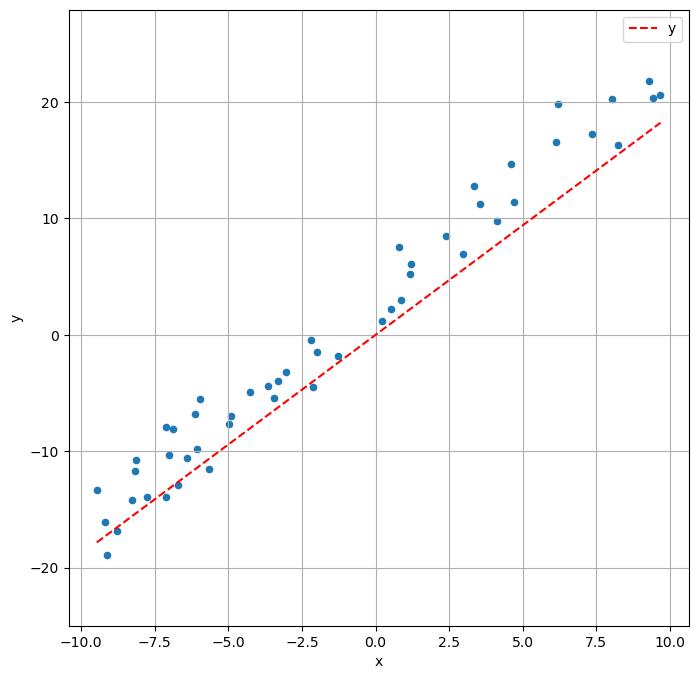

In [45]:
utils.plot_1d_regression_samples(df2, theta=float(theta_opt2))

- On observe une forte hausse de la MSE, de 3,10 à 12,00
- La droite de regression ne semble pas être au milieu des points
- **On en déduit que la formule n'est pas d'actualité dans ce modèle**

---

On pose $\hat{x}_i = (x_i, 1) \in \mathbb{R}^2$, pour $i = 1,\dots,n$. On dit parfois que $\hat{x}_i$ est une observation "augmentée" (parce qu'on a augmenté la dimension, de $1$ à $2$, en rajoutant une coordonnée).

**Question 5:** Établir (mathématiquement) l'expression de la MSE qu'on cherche à optimiser en fonction des observations  $\hat{x}_i$, des labels $y_i$, et des paramètres du modèle $a,b$. 

_Indication:_ On pourra utiliser la notation $\theta = (a,b)$, et l'écriture produit-scalaire : $\theta \cdot \hat{x_i} = \begin{pmatrix} a, b \end{pmatrix} \begin{pmatrix} x_i \\ 1 \end{pmatrix} = a x_i + b$.

-- Écrivez votre réponse ici. --

---

Notre objectif est donc de trouver les paramètres $a^*,b^*$ qui minimisent cette MSE. On admet (bonus: démontrer ce résultat par un calcul de gradient) qu'on les obtient par les relations:

$$ a^* = \frac{\sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2} $$

et

$$ b^* = \overline{y} - a^* \overline{x} $$

où $\overline{x}$ représente la moyenne des $x_i$, et $\overline{y}$ représente la moyenne des $y_i$. 

**Question 6 :** Déterminer numériquement $a^*$ et $b^*$ pour le `DataFrame` considéré. Affichez le modèle grâce à la cellule de code suivante. 

In [64]:
a2 = np.sum((x2 - np.mean(x2)) * (y2 - np.mean(y2))) / np.sum((x2 - np.mean(x2)) ** 2)
b2 = np.mean(y2) - a2 * np.mean(x2)

print(f"a* = {a2}")
print(f"b* = {b2}")

# je me suis basé sur le code de plot_1d_regression_samples pour formulé theta
theta_new = np.array([a2, b2])

a* = 2.004997505237334
b* = 2.901900666509872


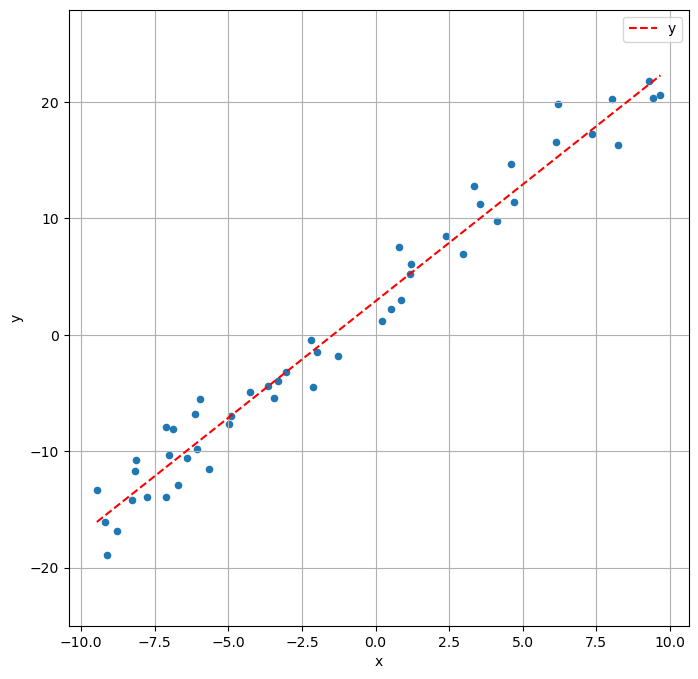

In [65]:
# Pour afficher le modèle obtenu
utils.plot_1d_regression_samples(df2, theta=theta_new)

---

## 2. Régression linéaire en 2D (et au-delà) grâce à scikit-learn

On va maintenant considérer des modèles linéaires en plus grande dimension, c'est-à-dire qu'on a des observations $x_i \in \mathbb{R}^d$ avec $d \geq 2$, des labels $y_i \in \mathbb{R}$, et on cherche une relation de la forme 

$$y = A X + b$$

où 
$$X = \begin{pmatrix} x_1[1] & \dots & x_1[d] \\ \vdots & & \vdots \\ x_n[1] & \dots & x_n[d] \end{pmatrix}$$

et $A, b$ sont des paramètres qu'on va chercher à optimiser. On rappelle qu'il existe une forme explicite pour déterminer les $A$ et $b$ optimaux (qui minimisent la MSE ; voir cours), on pourrait donc tout coder nous-mêmes. Mais pour simplifier, on va se reposer sur `scikit-learn`. 

Pour changer, on va maintenant manipuler nos données sous la forme de `np.array`. 

In [66]:
# On définit nos paramètres globaux
dim = 2  # dimension dans laquelle vit X
n_samples = 200  # le nombre d'observations qu'on va considérer

# On fabrique notre matrice A et le paramètre b aléatoirement
A = np.random.uniform(low = -1, high = 1, size=(dim,1))
b = np.random.uniform(low = -1, high=1, size=(1))

# On génère un jeu de données avec X en 2D, 200 points. 
X, y = utils.gen_nd_dataset(dim=dim, n_samples=n_samples, A=A, b=b)

print('Taille de X :', X.shape)

Taille de X : (200, 2)


Comme `X` représente des observations en dimension $2$, c'est un peu plus délicat d'afficher $y$ en fonction de $X$ (bon, on pourrait faire un plot en 3d mais ce n'est pas souvent très élégant). Une méthode est d'utiliser des couleurs.

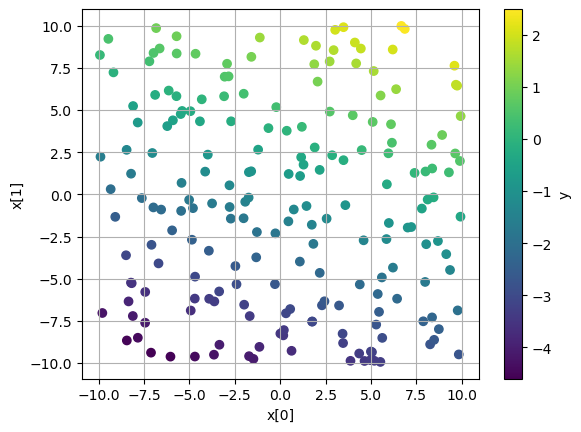

In [67]:
utils.plot_2d_with_color(X,y)

---

**Question 7 :** En utilisant la classe `LinearRegression` dont la documentation est disponible [ici](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), déterminer les paramètres $A, b$ optimaux en termes de MSE. 

_Remarque:_ Pour apprendre (rapidement) à se servir des méthodes de `sklearn`, il ne faut pas hésiter à regarder les exemples fournis dans la documentation. 

In [89]:
reg = LinearRegression().fit(X, y)

opt_a = reg.coef_
opt_b = reg.intercept_

print(f"A* = {opt_a}")
print(f"b* = {opt_b}")

A* = [[0.11202684 0.28627361]]
b* = [-1.11618124]


---

**Question 8:** En utilisant la méthode `mean_squared_error()` de scikit-learn dont la documentation est disponible [ici](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error), évaluer la MSE de votre modèle après son entraînement. 

In [95]:
y_pred = model.predict(X)
mse_scikit = mean_squared_error(y, y_pred)
print(f"MSE scikit-learn: {mse_scikit}")

MSE scikit-learn: 1.8737911689327847e-30


---

On génère maintenant un jeu de données test avec la cellule de code suivante.

In [96]:
X_test, y_test = utils.gen_nd_dataset(dim=dim, n_samples=n_samples, A=A, b=b)

**Question 9:** Déterminer la MSE de votre modèle sur ce jeu de test. Commenter le résultat obtenu.

In [98]:
y_test_pred = model.predict(X_test)
test = mean_squared_error(y_test, y_test_pred)
print(f"MSE test: {test}")

MSE test: 30.67001885966689


- On passe d'une mse < 0, à une mse > 30
- **Le modèle ne fait pas de bonnes prédictions sur ce nouveau jeu de test**

# Partie 3 (facultative) : Une descente de gradient

Dans le cas des régressions linéaires, où on cherche à estimer des relations du type $y \simeq AX + b$, on a vu que les paramètres optimaux $A^*,b^*$ sont disponibles sous forme explicite. Ce n'est pas le cas lorsqu'on considère des modèles plus compliqués. 

Ici, on va considérer un modèle dit « quasi-linéaire », de la forme 

$$y \simeq \log\left(1 + e^{\theta x}\right),$$

où, pour simplifier, on va considérer $x \in \mathbb{R}, \theta \in \mathbb{R}$. 

Ainsi, lorsqu'on veut optimiser $\theta$ de sorte à minimiser la MSE, à partir d'observations $x_1,\dots, x_n$, on cherche à minimiser la fonction 

$$ L : \theta \mapsto \frac{1}{2} \sum_{i=1}^n \left( \log\left(1 + e^{\theta x_i}\right) - y_i \right)^2.$$

On peut vérifier que le _gradient_ de cette fonction est donné par

$$\nabla L(\theta) = \sum_{i=1}^n \frac{x_i}{1 + e^{- \theta x_i}} \left(\log\left(1 + e^{\theta x_i}\right) - y_i \right). $$

Ici, il n'est pas évident de déterminer le $\theta^*$ optimal (ce serait la solution de $\nabla L(\theta) = 0$, mais on ne va pas réussir à l'obtenir...). On va donc l'estimer au moyen d'une _descente de gradient_. On rappelle que le gradient $\nabla L(\theta)$ correspond à la direction dans laquelle---localement---la MSE $L(\theta)$ augmente le plus. Donc, logiquement, si on remplace $\theta$ par $\theta' = \theta - \eta \nabla L(\theta)$ pour un certain paramètre $\eta$ (assez petit), on s'attend à ce que $L(\theta') < L(\theta)$. 

De proche en proche, on va donc pouvoir construire une séquence $\theta_1,\theta_2,\dots$ qui a pour but de **minimiser** la fonction objectif $\theta \mapsto L(\theta)$. 

On va donc considérer l'algorithme suivant, dit algorithme de _descente de gradient_ : 

- On se donne des observations $x_i$ et des labels $y_i$. 
- On se donne un $\theta_0$ initial (tiré aléatoirement par exemple). 
- On se fixe un nombre d'itérations (_epoch_ en anglais) $T$. 
- Pour $t = 1,\dots, T$ faire: $\theta_{t+1} \leftarrow \theta_t - \eta \nabla L(\theta_t)$. 
- On renvoie la séquence $[\theta_0,\theta_1,\dots,\theta_T]$. 

On commence par générer et afficher nos données d'entraînement.

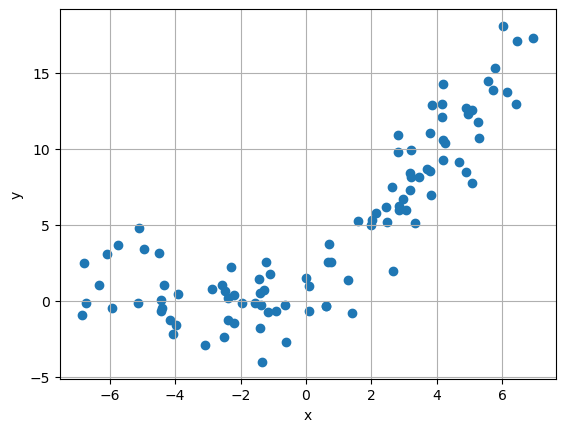

In [99]:
x, y = utils.gen_log_data(n_samples = 100)

utils.plot_1d_log_model(x,y)

---

**Question 1:** Définir une fonction `loss(theta, x, y)` qui détermine la valeur de la fonction objectif $L(\theta)$ pour le jeu d'observations et labels `x,y`.

Évaluer cette fonction sur votre jeu d'entraînement le paramètre `theta = 2`.

In [129]:
def loss(theta, x, y):
    return 0.5 * np.sum((np.log(1 + np.exp(theta * x)) - y) ** 2)

loss(2, x, y)

266.31137188231276

---

**Question 2:** Définir une fonction `grad(theta, x, y)` qui calcule le gradient, en un point `theta` (et pour un jeu d'observations et labels `x,y`) de la fonction objectif $L(\theta)$. 

In [138]:
def grad(theta, x, y):
    return np.sum((x / (1 + np.exp(-theta * x))) * (np.log(1 + np.exp(theta * x)) - y))

grad(2, x, y)

-360.2057603228338

---

**Question 3:** Implémenter l'algorithme de descente de gradient, sous la forme d'une fonction `grad_descent(theta_init, eta, T, x, y)` qui prend en entrée 
- `theta_init` : la valeur du paramètre initial $\theta_0$. 
- `eta` : le paramètre utilisé dans la descente de gradient (appelé _pas de gradient_ ou _learning rate_).
- `T` : le nombre d'itérations qu'on compte effectuer. 
- `x, y` le jeu de données / observations.

Et qui renvoie deux listes : 
- `list_thetas` : la liste $(\theta_t)_t$ déterminés au cours de la descente. 
- `list_losses` : la liste des valeurs $(L(\theta_t))_t$ de la fonction objectif au cours de la descente. 

rappel de l'algo:


On va donc considérer l'algorithme suivant, dit algorithme de _descente de gradient_ : 

- On se donne des observations $x_i$ et des labels $y_i$. 
- On se donne un $\theta_0$ initial (tiré aléatoirement par exemple). 
- On se fixe un nombre d'itérations (_epoch_ en anglais) $T$. 
- Pour $t = 1,\dots, T$ faire: $\theta_{t+1} \leftarrow \theta_t - \eta \nabla L(\theta_t)$. 
- On renvoie la séquence $[\theta_0,\theta_1,\dots,\theta_T]$. 

In [131]:
def descente_gradient(theta_init, eta, T, x, y):
    list_thetas = [theta_init]
    list_losses = [loss(theta_init, x, y)]
    theta = theta_init
    
    for t in range(T):
        theta = theta - eta * grad(theta, x, y)
        list_thetas.append(theta)
        list_losses.append(loss(theta, x, y))
    
    return list_thetas, list_losses

---

**Question 4:** Exécuter votre algorithme avec `theta_init = -2`, `eta = 0.001` et `T = 100` (et évidemment les données `x,y` générées ci-dessus). 

On pourra visualiser les résultats en utilisant la fonction `utils.plot_gd_log_model(list_thetas, list_losses, x, y, loss)`. 

In [132]:
thetas, losses = descente_gradient(-2, 0.001, 100, x, y)

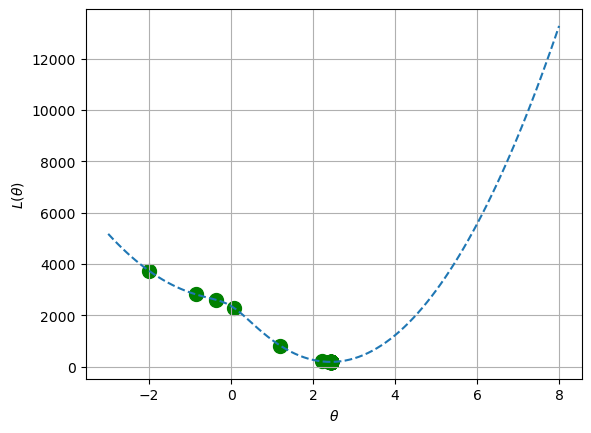

In [135]:
utils.plot_gd_log_model(thetas, losses, x, y, loss)